In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
#import missingno as msno 
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

In [2]:
system = 'windows'

# Prenatal Data
parent = os.path.dirname(os.getcwd())
if system == 'windows':
    dataPath = os.path.join(parent, r"Data\MOMI\Final_Prenatal_DeIdentified.xlsx")
    prenatal = pd.read_excel('file:\\' + dataPath)
else:
    dataPath = os.path.join(parent, r"Data/MOMI/Final_Prenatal_DeIdentified.xlsx")
    prenatal = pd.read_excel('file://' + dataPath)

# MOMI Data
parent = os.path.dirname(os.getcwd())
if system == 'windows':
    dataPath = os.path.join(parent, r"Data\MOMI\Final_MOMI_DeIdentified_Update_39Mar2021.xlsx")
    momi = pd.read_excel('file:\\' + dataPath)
else:
    dataPath = os.path.join(parent, r"Data/MOMI/Final_MOMI_DeIdentified_Update_39Mar2021.xlsx")
    momi = pd.read_excel('file://' + dataPath)

# Ultrasound Data
parent = os.path.dirname(os.getcwd())
if system == 'windows':
    dataPath = os.path.join(parent, r"Data\MOMI\Final_Ultrasound_DeIdentified.xlsx")
    ultrasound = pd.read_excel('file:\\' + dataPath)
else: 
    dataPath = os.path.join(parent, r"Data/MOMI/Final_Ultrasound_DeIdentified.xlsx")
    ultrasound = pd.read_excel('file://' + dataPath)

# Fix MOMI missing values to np.NaN
momi['MIDBV'] = np.where(momi['MIDBV'] == 99, np.NaN, momi['MIDBV'])
momi['MIDCHLAM'] = np.where(momi['MIDCHLAM'] == 99, np.NaN, momi['MIDCHLAM'])
momi['MIDCONDY'] = np.where(momi['MIDCONDY'] == 99, np.NaN, momi['MIDCONDY'])
momi['MIDGC'] = np.where(momi['MIDGC'] == 99, np.NaN, momi['MIDGC'])
momi['MIDHEPB'] = np.where(momi['MIDHEPB'] == 99, np.NaN, momi['MIDHEPB'])
momi['MIDTRICH'] = np.where(momi['MIDTRICH'] == 99, np.NaN, momi['MIDTRICH'])
momi['MIDGBS'] = np.where(momi['MIDGBS'] == 99, np.NaN, momi['MIDGBS'])
momi['MHXPARA'] = np.where(momi['MHXPARA'] == 99, np.NaN, momi['MHXPARA'])
momi['MHXABORT'] = np.where(momi['MHXABORT'] == 99, np.NaN, momi['MHXABORT'])
momi['MHXGRAV'] = np.where(momi['MHXGRAV'] == 99, np.NaN, momi['MHXGRAV'])
momi['MomEducation_State'] = np.where(momi['MomEducation_State'] == 'Unknown', np.NaN, momi['MomEducation_State'])
momi['DadEducation_State'] = np.where(momi['DadEducation_State'] == 'Unknown', np.NaN, momi['DadEducation_State'])
momi['Smoke_b'] = np.where(momi['Smoke_b'] == 'Unknown (unable to assess)', np.NaN, momi['Smoke_b'])
momi['Race'] = np.where(momi['Race'].isin(['9', 'A']), np.NaN, momi['Race'])
momi['Ethnicity'] = np.where(momi['Ethnicity'].isin(['UNSPECIFIED']), np.NaN, momi['Ethnicity'])
momi['InfSex'] = np.where(momi['InfSex'] == 'U', np.NaN, momi['InfSex'])
momi['InfSex'] = np.where(momi['InfSex'] == 'f', 'F', momi['InfSex'])

In [5]:
# Dropping erroneous prenatal data. This data does not actually exist, is thousands of missing values
prenatal.drop(prenatal[prenatal['DELWKSGT'].isnull()].index, inplace=True)
prenatal.drop(prenatal[prenatal['PNV_Total_Number'].isnull()].index, inplace=True)


insuranceMap = {1: 'MedicalAssistance',
                2: 'PrivateInsurance',
                3: 'Self-pay'}

momi['DFC'] = momi['DFC'].map(insuranceMap)

outcomeMap = {1: 'SingleStillborn',
              2: 'TwinsLiveborn',
              3: 'TwinsOneLive',
              4: 'TwinsStillborn',
              5: 'MultsLiveborn',
              6: 'OtherMultSomeLive',
              7: 'OtherMultStillborn',
              9: np.NaN,
              10: 'SingleLiveborn'}

momi['MMULGSTD'] = momi['MMULGSTD'].map(outcomeMap)

neurMuscDiseaseMap = {0: 'None',
                      1: 'Multiple Sclerosis',
                      2: 'Cerebal Palsy',
                      3: 'Myotonic Dystrophy',
                      4: 'Myasthenia Gravis',
                      5: 'Other'}

momi['MCNSMUSC'] = momi['MCNSMUSC'].map(neurMuscDiseaseMap)

collagenVascMap = {0: 'None',
                   1: 'Rhematoid Arthritis',
                   2: 'Lupus',
                   8: 'Multiple Diagnostic Codes'}

momi['MCOLVASC'] = momi['MCOLVASC'].map(collagenVascMap)

struHeartMap = {0: 'None',
                1: 'Congenital Heart Disease',
                2: 'Rheumatic Heart Disease',
                3: 'Myocarditis/Cardiomyopathy',
                4: 'ValveDisorder',
                5: 'ArtificialValves',
                9: 'Other'}

momi['MCVDANAT'] = momi['MCVDANAT'].map(struHeartMap)

postpartMap = {0: 'None',
               1: 'Endometritis',
               2: 'UrinaryTractInfection',
               3: 'Hemmorrage',
               4: 'WoundInfection',
               5: 'Disseminated',
               6: 'Obstruction',
               9: 'Other'}

momi['MDELCOMP'] = momi['MDELCOMP'].map(postpartMap)

diabetesMap = {0: 'None',
               1: 'GestationalDiabetes',
               2: 'TypeI',
               3: 'TypeII',
               4: 'UnspecifiedPriorDiabetes'}

momi['MENDDIAB'] = momi['MENDDIAB'].map(diabetesMap)

thyroidMap = {0: 'None',
              1: 'Hyperthyroid',
              2: 'Hypothyroid',
              9: 'Other'}

momi['MENDTHY'] = momi['MENDTHY'].map(thyroidMap)

liverGallMap = {0: 'None',
                1: 'HepA',
                2: 'HepB',
                3: 'HepC',
                4: 'HepD',
                5: 'HepE',
                6: 'LiverTransplant',
                7: 'Cholelithiasis',
                8: 'Pancreatitis',
                9: 'Other'}

momi['MGILGBP'] = momi['MGILGBP'].map(liverGallMap)

kidneyMap = {0: 'None',
             1: 'Glomerulonephritis',
             2: 'Pyelonephritis;',
             3: 'LupusNephritis',
             4: 'NephroticSyndrome',
             5: 'Nephrolithiasis',
             6: 'Transplant;',
             7: 'RenalAbscess',
             8: 'MultipleDiagnosticCodes',
             9: 'Other'}

momi['MGURENAL'] = momi['MGURENAL'].map(kidneyMap)

anemiaMap = {0: 'None',
             1: 'IronDeficiencyAnemia',
             2: 'B12DeficiencyAnemia',
             3: 'FolateDeficiencyAnemia',
             9: 'UnspecifiedAnemia'}

momi['MHEMANEM'] = momi['MHEMANEM'].map(anemiaMap)

hemoGlob = {0: 'None',
            1: 'Hgb-SS',
            2: 'Hgb-SC',
            3: 'Hgb-Sthal',
            4: 'AlphaThalassemia',
            5: 'BetaThalassemia',
            6: 'SickleCellTrait',
            9: 'Other'}

momi['MHEMHGB'] = momi['MHEMHGB'].map(hemoGlob)

thromMap = {0: 'None',
            1: 'Gestational',
            2: 'DisseminatedIntravascularCoagulation',
            3: 'MultipleDiagnosticCodes',
            9: 'Other'}

momi['MHEMPLT'] = momi['MHEMPLT'].map(thromMap)

viralMap = {0: 'None',
            1: 'PrimaryCMV',
            2: 'ParovirusB19',
            3: 'Rubella',
            4: 'Toxoplasma',
            5: np.NaN,
            8: 'MultipleDiagnosticCodes',
            9: 'Other'}

momi['MIDVIRPR'] = momi['MIDVIRPR'].map(viralMap)

substanceMap = {0: 'None',
                1: 'Stimulants',
                2: 'Sedatives/Hypnotics/Anxiolytics',
                3: 'Anti-depressants/OtherPsychoactives',
                4: 'Hallucinogens',
                6: 'Alcohol',
                8: 'MultipleDiagnosticCodes',
                9: 'Other'}

momi['MTOXOTHR'] = momi['MTOXOTHR'].map(substanceMap)

anoAnoMap = {0: 'None',
             1: 'Anencephaly/Similar',
             2: 'Encephalocele',
             3: 'Microcephaly',
             4: 'CongenitalHydrocephalus',
             5: 'SpinaBifida',
             8: 'MultipleDiagnosticCodes',
             0: 'OtherCongenital'}

momi['ICNSANAT'] = momi['ICNSANAT'].map(anoAnoMap)



# Ordinal Encoding Education
education_map = {'8th grade or less': 1,
                 '9th-12th grade, no diploma': 2,
                 'High school graduate or GED completed': 3,
                 'Some college credit, no degree': 4,
                 'Associate degree': 5,
                 "Bachelor's degree": 6,
                 "Master's degree": 7,
                 'Doctorate or professional degree': 8,
                 'Doctorate or Professional degree': 8}

momi['DadEducation_State'] = momi['DadEducation_State'].map(education_map)

momi['MomEducation_State'] = momi['MomEducation_State'].map(education_map)


# Renaming Race variables for easier comparison
raceMap = {'B': 'AfricanAmerican', 'C': "Chinese", 'D': "Declined",
           'E': "OtherAsian", 'F': "Filipino", 'G': "Guam/Chamorro",
           'I': "Indian(Asian)", 'J': "Japanese", 'K': "Korean",
           'L': "AlaskanNative", 'N': "NativeAmerican", 'P': "OtherPacificIslander",
           'Q': "Hawaiian", 'S': "Samoan", 'V': "Vietnamese", 'W': "White", 'D': "Declined", 9: np.NaN}

momi['Race'] = momi['Race'].map(raceMap)

# Collapsing Race categories
momi['RaceCollapsed'] = np.NaN

AsianGroups = ['OtherAsian', 'Indian(Asian)', 'Chinese', 'Korean', 'Filipino', 'Japanese', 'Vietnamese']
Polynesian = ['Hawaiian', 'Samoan', 'OtherPacificIslander', 'Guam/Chamorro']  # Unsure about Guam
NativeGroups = ['NativeAmerican', 'AlaskanNative']

# Asian
momi['RaceCollapsed'] = np.where((momi['Race'].isin(AsianGroups)), 'Asian', momi['RaceCollapsed'])
# Polynesian
momi['RaceCollapsed'] = np.where((momi['Race'].isin(Polynesian)), 'Polynesian', momi['RaceCollapsed'])
# Native
momi['RaceCollapsed'] = np.where((momi['Race'].isin(NativeGroups)), 'Native', momi['RaceCollapsed'])
# African
momi['RaceCollapsed'] = np.where((momi['Race'] == 'AfricanAmerican'), 'African', momi['RaceCollapsed'])
# White
momi['RaceCollapsed'] = np.where((momi['Race'] == 'White'), 'White', momi['RaceCollapsed'])

# Renaming Hypertensive variables for easier comparison
hypMap = {0: 'None', 1: 'TransientHypertension',
          2: 'Preeclampsia mild', 3: 'PreeclampsiaSevere',
          5: 'Eclampsia', 6: 'ChronicHypwPre',
          8: 'MultipleDiagnosticCodes', 9: 'UnspecifiedHyp'}

momi['MOBHTN'] = momi['MOBHTN'].map(hypMap)

# Set mildpe to 0 if marked severe
momi['Mild_PE'] = np.where(momi['MOBHTN'] == 'PreeclampsiaSevere', 0, momi['Mild_PE'])

# Looking at any occurance of Preeclampsia/Eclampsia
momi['Preeclampsia/Eclampsia'] = np.NaN
momi['Preeclampsia/Eclampsia'] = np.where(
    (momi['Mild_PE'] == 1) | (momi['Severe_PE'] == 1) | (momi['SIPE'] == 1) | (momi['MOBHTN'] == 'Eclampsia'), 1, 0)

# Renaming columns for easier analysis
momi.rename(columns={"DMOMAGE": "MotherAge", "FatherAge_State": "FatherAge", "DFC": "Insurance",
                     "DELWKSGT": "GestAgeDelivery", "MHXGRAV": "TotalNumPregnancies",
                     "MHXPARA": "DeliveriesPriorAdmission",
                     "MHXABORT": "TotalAbortions", "PRIMIP": "Primagrivada", "DMOMHGT": "MaternalHeightMeters",
                     "MOBRPWT": "PrePregWeight", "MOBADMWT": "WeightAtAdmission",
                     "FOBLABHR": "HoursLaborToDelivery",
                     "FOBROMHR": "HoursMembraneReptureDelivery", "CSREPEAT": "RepeatCesarean",
                     "FDELTYPE": "DeliveryMethod",
                     "MMULGSTD": "OutcomeOfDelivery", "FOBDEATH": "FetalDeath",
                     "MCNSMUSC": "MaternalNeuromuscularDisease",
                     "MCOLVASC": "MCollagenVascularDisease", "MCVDANAT": "MStructuralHeartDiseas",
                     "MCVDHTN": "ChronicHypertension",
                     "MOBHTN": "PregRelatedHypertension", "MDELCOMP": "MPostPartumComplications",
                     "MDEPRESS": "Depression",
                     "MENDDIAB": "DiabetesMellitus", "MENDTHY": "ThyroidDisease",
                     "MGIHYPER": "HyperemesisGravidarum",
                     "MGILGBP": "MLiverGallPanc", "MGUINFER": "HistoryInfertility", "MGURENAL": "KidneyDisease",
                     "MHEARTOPER": "OperationsOnHeartandPericardium", "MHEMANEM": "MAnemiaWOHemoglobinopathy",
                     "MHEMHGB": "MHemoglobinopathy", "MHEMPLT": "Thrombocytopenia", "MHEMTRAN": "TransfusionOfPRBC",
                     "MIDBV": "BacterialVaginosis", "MIDCHLAM": "Chlamydia", "MIDCONDY": "Condylomata",
                     "MIDGBS": "GroupBStrep", "MIDGC": "GonococcalInfection", "MIDHEPB": "HepBInfection",
                     "MIDHSV": "Herpes", "MIDTB": "Tuberculosis", "MIDTRICH": "Trichomonas",
                     "MIDVIRPR": "ViralOrProtoInf",
                     "MINTERINJ": "ThoraxAbPelvInjuries", "MMORTECLAMP": "Eclampsia",
                     "MMORTHEARTFAIL": "HeartFailure",
                     "MMORTRENAL": "AcuteRenalFailure", "MMORTSICKLECELL": "SickleCell",
                     "MOBPRECS": "PreviousCesarean",
                     "MPULASTH": "Asthma", "MTOXCOC": "Cocaine", "MTOXNARC": "Opioid",
                     "MTOXOTHR": "OtherSubstanceAbuse",
                     "MTOXTHC": "Marijuana", "IDEMBWT": "InfantWeightGrams", "IGROWTH": "GestWeightCompare",
                     "ICNSANAT": "CNSAbnormality", "IIDSYPH": "CongenitalSyphilis", "IIDUTI": "UTI",
                     "Alcohol_a": 'Drinks/Week'}, inplace=True)

# Dropping variables with more than 20% missing values
momi = momi.loc[:, momi.isnull().mean() < .20]

# Joining the momi data with the prenatal data - we want women who never had preeclampsia and first incidence of
# preeclampsia, nothing else
# Step 1, split systolic and diastolic
new = prenatal["PNV_BP"].str.split("/", n=1, expand=True)
prenatal["Systolic"] = new[0]
prenatal["Diastolic"] = new[1]
prenatal[["Systolic", "Diastolic"]] = prenatal[["Systolic", "Diastolic"]].apply(pd.to_numeric)


# MAP = (Sys + (2*Dias))/3
prenatal['MAP'] = np.NaN
prenatal['MAP'] = (prenatal['Systolic'] + (2* prenatal['Diastolic']))/3

# Step 2, make indicator variable
prenatal['High'] = np.where((prenatal['Systolic'] >= 130) | (prenatal['Diastolic'] >= 80), 1, 0)

# Step 3, make a cumulative sum to count how many times this person has had spikes
prenatal['Prev_highBP'] = prenatal.groupby(['MOMI_ID', 'Delivery_Number_Per_Mother'])['High'].cumsum().astype(int)

# Drop all women under 14 weeks from prenatal data
prenatal.drop(prenatal.loc[prenatal['PNV_GestAge'] > 14].index, inplace=True)
momi.sort_values('MOMI_ID', inplace=True)
uniquePregMomi = momi.drop_duplicates(subset=['MOMI_ID', 'Delivery_Number_Per_Mother'], keep='last')

prenatal.sort_values('PNV_GestAge', ascending=False, inplace=True)  # For preferenceing high bp
uniquePregPrenatal = prenatal.drop_duplicates(subset=['MOMI_ID', 'Delivery_Number_Per_Mother'], keep='first')
join = pd.merge(uniquePregMomi, uniquePregPrenatal, how='right')

# Removes duplicates, keeping only instances with Preeclampsia
join.sort_values('Preeclampsia/Eclampsia', ascending=False, inplace=True)
join = join.drop_duplicates(subset=['MOMI_ID'], keep='first')

<ipython-input-5-dca1fce56ae6>:281: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  momi.sort_values('MOMI_ID', inplace=True)


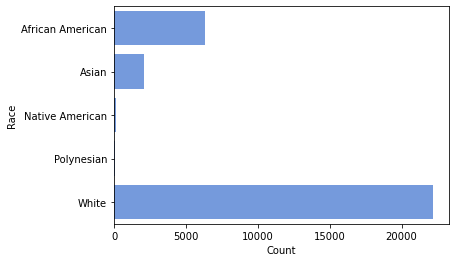

In [15]:
join['RaceCollapsed'] = np.where((join['RaceCollapsed'] == 'African'), 'African American', join['RaceCollapsed'])

raceCounts = join['RaceCollapsed'].value_counts(dropna=True).sort_index()
ax =sns.barplot(x=raceCounts.values, y=raceCounts.index, color='cornflowerblue')
ax.set(xlabel='Count',ylabel='Race')
plt.savefig('RaceCountMOMI.pdf', dpi=400, bbox_inches = "tight")

In [22]:
join.groupby('RaceCollapsed')['Preeclampsia/Eclampsia'].value_counts(normalize=True)*100

RaceCollapsed     Preeclampsia/Eclampsia
African American  0                         88.589865
                  1                         11.410135
Asian             0                         94.592030
                  1                          5.407970
Native American   0                         91.176471
                  1                          8.823529
Polynesian        0                         97.222222
                  1                          2.777778
White             0                         91.638118
                  1                          8.361882
Name: Preeclampsia/Eclampsia, dtype: float64

In [21]:
join.groupby('RaceCollapsed')['Preeclampsia/Eclampsia'].value_counts()

RaceCollapsed     Preeclampsia/Eclampsia
African American  0                          5629
                  1                           725
Asian             0                          1994
                  1                           114
Native American   0                            93
                  1                             9
Polynesian        0                            35
                  1                             1
White             0                         20329
                  1                          1855
Name: Preeclampsia/Eclampsia, dtype: int64

In [8]:
join.loc[join['RaceCollapsed']=='nan']

,MOMI_ID,Delivery_Number_Per_Mother,DeliveryYear,Has_Prenatal_Data,Has_Ultrasound_PlacLoc,MotherAge,Race,Insurance,GestAgeDelivery,TotalNumPregnancies,...,PNV_Total_Number,PNV_GestAge,PNV_BP,PNV_Weight_Oz,Systolic,Diastolic,MAP,High,Prev_highBP,RaceCollpased
7914,61872367991976,1,2015,1,1,38.0,NaN,PrivateInsurance,40.714286,1.0,...,13.0,13.142857,110/64,1936.0,110.0,64.0,79.333333,0,0,test
28824,32335683991978,1,2019,1,1,40.0,Declined,MedicalAssistance,34.000000,4.0,...,5.0,10.285714,127/82,3056.0,127.0,82.0,97.000000,1,1,test
29265,75196247991987,1,2016,1,1,29.0,NaN,PrivateInsurance,39.285714,3.0,...,11.0,10.142857,116/80,3696.0,116.0,80.0,92.000000,1,1,test
7482,27358636991987,1,2016,1,1,28.0,NaN,PrivateInsurance,40.571429,1.0,...,10.0,13.142857,110/64,2104.0,110.0,64.0,79.333333,0,0,test
15979,12975927991983,1,2018,1,1,35.0,Declined,PrivateInsurance,39.428571,2.0,...,9.0,12.142857,112/70,2384.0,112.0,70.0,84.000000,0,0,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12778,49895375991987,1,2019,1,1,31.0,Declined,MedicalAssistance,39.142857,4.0,...,8.0,12.571429,110/68,3936.0,110.0,68.0,82.000000,0,1,test
12422,14415981991979,1,2019,1,1,39.0,Declined,PrivateInsurance,39.000000,2.0,...,15.0,12.571429,94/60,2288.0,94.0,60.0,71.333333,0,0,test
12464,88595263991986,1,2020,1,0,34.0,NaN,PrivateInsurance,40.000000,2.0,...,13.0,12.571429,116/70,2208.0,116.0,70.0,85.333333,0,0,test
12398,65647731991985,1,2019,1,1,33.0,Declined,PrivateInsurance,38.000000,1.0,...,11.0,12.571429,116/76,2880.0,116.0,76.0,89.333333,0,0,test


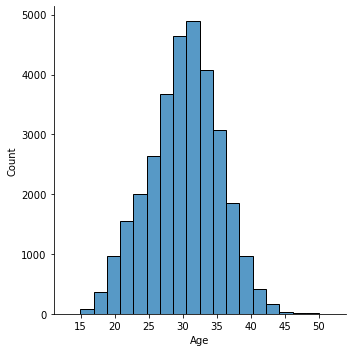

In [30]:
ax = sns.displot(join, x="MotherAge", bins=20)
ax.set(xlabel='Age')
plt.savefig('MomiAgePre.png', dpi=400, bbox_inches = "tight")

In [52]:
join.shape

(31431, 95)

In [3]:
parent = os.path.dirname(os.getcwd())
datapath = os.path.join(parent, 'Preprocess/momiEncoded_061521.csv')
data = pd.read_csv(datapath)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Admin\\Documents\\Preeclampsia_Research\\Preeclampsia_Research\\Preprocess/momiEncoded_061521.csv'

In [37]:
#cat_cols = join.select_dtypes(include=object).columns.tolist()
vcounts = (pd.DataFrame(
    join[catCols]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'counts']))


In [50]:
vcounts = (pd.DataFrame(
    join[catCols]
    .melt(var_name='column', value_name='value')
    .value_counts(normalize=True)))

In [51]:
vcounts.reset_index().to_excel('momiPreValueCountsNorm_063912.xlsx', index=False)

In [43]:
vcounts.reset_index()

,column,value,counts
0,AcuteRenalFailure,1.0,97
1,AcuteRenalFailure,0.0,31334
2,Asthma,1.0,3485
3,Asthma,0.0,27946
4,Autoimmune_Other,1.0,3
...,...,...,...
173,ViralOrProtoInf,Toxoplasma,1
174,ViralOrProtoInf,PrimaryCMV,2
175,ViralOrProtoInf,None,31427
176,Vitamin_D_Deficiency,1.0,34


In [29]:
catCols = ['Insurance',  'Primagrivada',
        'RepeatCesarean', 'SINGLETON',
       'MaternalNeuromuscularDisease', 'MCollagenVascularDisease',
       'MStructuralHeartDiseas', 'ChronicHypertension', 'Gest_HTN',
       'Unspecified_HTN', 'Depression', 'DiabetesMellitus', 'ThyroidDisease',
       'HyperemesisGravidarum', 'MLiverGallPanc', 'HistoryInfertility',
       'KidneyDisease', 'OperationsOnHeartandPericardium',
       'MAnemiaWOHemoglobinopathy', 'MHemoglobinopathy', 'Thrombocytopenia',
       'TransfusionOfPRBC', 'BacterialVaginosis', 'Chlamydia', 'Condylomata',
       'GroupBStrep', 'GonococcalInfection', 'HepBInfection', 'Herpes',
       'Tuberculosis', 'Trichomonas', 'ViralOrProtoInf',
       'ThoraxAbPelvInjuries', 'HeartFailure', 'AcuteRenalFailure',
       'SickleCell', 'PreviousCesarean', 'Asthma', 'Cocaine', 'Opioid',
       'OtherSubstanceAbuse', 'Marijuana', 'Autoimmune_Other', 'CKD',
       'Hemorrhagic_Disorder', 'Proteinuria', 'Hx_Trophoblastic_Disease_1',
       'Periodontal_Disease', 'Thrombophilia', 'Venous_HTN',
       'Vitamin_D_Deficiency', 'History_PTB', 'Hist_Trophoblastic_Disease_2',
       'Infant_Number', 'InfSex', 'CNSAbnormality', 'CongenitalSyphilis',
       'UTI', 'RaceCollapsed', 'Preeclampsia/Eclampsia']

In [33]:
(pd.DataFrame(
    join[catCols]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'counts']))


TypeError: list indices must be integers or slices, not list

In [54]:
data.columns

Index(['MotherAge', 'Insurance', 'TotalNumPregnancies',
       'DeliveriesPriorAdmission', 'TotalAbortions', 'Primagrivada',
       'WeightAtAdmission', 'RepeatCesarean', 'SINGLETON',
       'MaternalNeuromuscularDisease', 'MCollagenVascularDisease',
       'MStructuralHeartDiseas', 'ChronicHypertension', 'Gest_HTN',
       'Unspecified_HTN', 'Depression', 'DiabetesMellitus', 'ThyroidDisease',
       'HyperemesisGravidarum', 'MLiverGallPanc', 'HistoryInfertility',
       'KidneyDisease', 'OperationsOnHeartandPericardium',
       'MAnemiaWOHemoglobinopathy', 'MHemoglobinopathy', 'Thrombocytopenia',
       'TransfusionOfPRBC', 'BacterialVaginosis', 'Chlamydia', 'Condylomata',
       'GroupBStrep', 'GonococcalInfection', 'HepBInfection', 'Herpes',
       'Tuberculosis', 'Trichomonas', 'ViralOrProtoInf',
       'ThoraxAbPelvInjuries', 'HeartFailure', 'AcuteRenalFailure',
       'SickleCell', 'PreviousCesarean', 'Asthma', 'Cocaine', 'Opioid',
       'OtherSubstanceAbuse', 'Marijuana', 'Auto

In [68]:
join[['MotherAge', 'Insurance', 'TotalNumPregnancies',
       'DeliveriesPriorAdmission', 'TotalAbortions','WeightAtAdmission','PNV_GestAge',
       'PNV_Weight_Oz', 'MAP', 'Prev_highBP','Infant_Number']].describe().reset_index().to_excel('momiPreValueCountsNums_063912.xlsx', index=False)

In [71]:
data['CongenitalSyphilis'].isnull().sum()

331

In [66]:
join[['MotherAge']].describe()

,MotherAge
count,31431.000000
mean,30.126754
std,5.329681
min,13.000000
25%,27.000000
50%,30.000000
75%,34.000000
max,52.000000


# Ultrasound join

IMPORTANT: Don't drop the duplicate momi_id and delivery numbers. The placenta can move around over the course of a pregnancy, so it's important to get all the locations throughout the pregnancy first. This is done by a groupby and sum, plus a reset index. Once that's done then it's safe to drop the duplicates

In [13]:
# Sort by delivery year and gestational age
ultrasound.sort_values(by=['DeliveryYear', 'USGestAge'])
ultrasound = ultrasound.loc[ultrasound['USGestAge']<14]

In [14]:
locations = ['USPlacLoc_1', 'USPlacLoc_2','USPlacLoc_3', 'USPlacLoc_4', 'USPlacLoc_5', 'USPlacLoc_6']

# Step one: create indicator columns
ultrasound['Loc_Anterior'] = 0
ultrasound['Loc_Posterior'] = 0
ultrasound['Loc_Lateral'] = 0
ultrasound['Loc_Fundal'] = 0
ultrasound['Loc_Previa'] = 0
ultrasound['Loc_LowLying'] = 0
ultrasound['Loc_NonDiagnostic'] = 0

# For each location column: 
for col in locations:
    #Check what the position is and mark the appropriate binary column
    ultrasound['Loc_Anterior'] = np.where(((ultrasound[col] ==1)), 1,ultrasound['Loc_Anterior'])
    ultrasound['Loc_Posterior'] = np.where(((ultrasound[col] ==2)), 1,ultrasound['Loc_Posterior'])
    ultrasound['Loc_Lateral'] = np.where(((ultrasound[col] ==3)), 1,ultrasound['Loc_Lateral'])
    ultrasound['Loc_Lateral'] = np.where(((ultrasound[col] ==4)), 1,ultrasound['Loc_Lateral'])
    ultrasound['Loc_Fundal'] = np.where(((ultrasound[col] ==5)), 1,ultrasound['Loc_Fundal'])
    ultrasound['Loc_Previa'] = np.where(((ultrasound[col] ==6)), 1,ultrasound['Loc_Previa'])
    ultrasound['Loc_LowLying'] = np.where(((ultrasound[col] ==7)), 1,ultrasound['Loc_LowLying'])
    ultrasound['Loc_NonDiagnostic'] = np.where(((ultrasound[col] ==8)), 1,ultrasound['Loc_NonDiagnostic'])

ultrasound.drop(columns=locations, inplace=True)

In [15]:
ultragroup = ultrasound.groupby(['MOMI_ID','Delivery_Number_Per_Mother']).sum()
ultragroup.reset_index(level=['MOMI_ID', 'Delivery_Number_Per_Mother'], inplace=True)
ultragroup.drop_duplicates(subset=['MOMI_ID', 'Delivery_Number_Per_Mother'], inplace=True)

In [16]:
# Remove result of summing, shoud result in correct binary
columns = ['Loc_Anterior', 'Loc_Posterior',
'Loc_Lateral', 'Loc_Fundal', 'Loc_Previa',
'Loc_LowLying', 'Loc_NonDiagnostic']
for col in columns:
    ultragroup[col] = np.where(((ultragroup[col] > 1)), 1,
                                             ultragroup[col])

## Testing merge

In [17]:
momi.drop_duplicates(subset=['MOMI_ID', 'Delivery_Number_Per_Mother'], inplace=True)

testMerge = pd.merge(momi,ultragroup[['MOMI_ID', 'Delivery_Number_Per_Mother', 'Loc_Anterior', 'Loc_Posterior',
       'Loc_Lateral', 'Loc_Fundal', 'Loc_Previa',
       'Loc_LowLying', 'Loc_NonDiagnostic']],on=['MOMI_ID', 'Delivery_Number_Per_Mother'], how='left')

testMerge.dropna(subset=['Loc_Anterior', 'Loc_Posterior',
       'Loc_Lateral', 'Loc_Fundal', 'Loc_Previa',
       'Loc_LowLying', 'Loc_NonDiagnostic'], inplace=True)

In [18]:
# Dropping variables we won't be using
testMerge.drop(columns=['MOMI_ID', 'Delivery_Number_Per_Mother', 'InfantWeightGrams', 'Eclampsia',
                   'GestAgeDelivery', 'DeliveryMethod', 'FetalDeath', 'OutcomeOfDelivery', 'DeliveryMethod',
                   'PregRelatedHypertension', 'Mild_PE', 'Severe_PE', 'SIPE', 'Has_Prenatal_Data',
                   'Has_Ultrasound_PlacLoc', 'NICULOS', 'InfantWeightGrams','GestWeightCompare',
                   'Race', 'DeliveryYear', 'MPostPartumComplications'], inplace=True)


# Renaming Hypertensive variables for easier comparison
hypMap = {'African': 0, 'Asian': 1,
          'Native': 2, 'Polynesian': 3,
          'White': 4}

testMerge['RaceCollapsed'] = testMerge['RaceCollapsed'].map(hypMap)

hypMap = {'F': 0, 'M': 1}
testMerge['InfSex'] = testMerge['InfSex'].map(hypMap)


testMerge.to_csv('momiUS_062521.csv', index=False)

In [41]:
for c in testMerge.columns:
    print(f'----{c}----')
    print(testMerge[c].value_counts(normalize=True).sort_index())
    print('')

----MOMI_ID----
11111351991995    0.000051
11122764991992    0.000051
11124425991995    0.000051
11128872991987    0.000051
11141482991988    0.000051
                    ...   
99974342991991    0.000051
99975723991994    0.000051
99982476991982    0.000051
99995178991975    0.000051
99999283991981    0.000051
Name: MOMI_ID, Length: 18702, dtype: float64

----Delivery_Number_Per_Mother----
1    0.813912
2    0.162169
3    0.020290
4    0.003015
5    0.000358
6    0.000153
7    0.000102
Name: Delivery_Number_Per_Mother, dtype: float64

----DeliveryYear----
2015    0.110140
2016    0.134161
2017    0.152509
2018    0.187775
2019    0.233620
2020    0.181795
Name: DeliveryYear, dtype: float64

----Has_Prenatal_Data----
1    1.0
Name: Has_Prenatal_Data, dtype: float64

----Has_Ultrasound_PlacLoc----
1    1.0
Name: Has_Ultrasound_PlacLoc, dtype: float64

----MotherAge----
13.0    0.000051
14.0    0.000102
15.0    0.001278
16.0    0.002249
17.0    0.005264
18.0    0.010784
19.0    0.016559


In [57]:
momi['Has_Prenatal_Data'].value_counts()

0    183857
1     45636
Name: Has_Prenatal_Data, dtype: int64

In [58]:
momi['Has_Ultrasound_PlacLoc'].value_counts()

0    160018
1     69475
Name: Has_Ultrasound_PlacLoc, dtype: int64

In [19]:
momtest = momi.loc[(momi['Has_Ultrasound_PlacLoc']==1) & (momi['Has_Prenatal_Data']==1)]

In [20]:
testMerge = pd.merge(momtest,ultragroup[['MOMI_ID', 'Delivery_Number_Per_Mother', 'Loc_Anterior', 'Loc_Posterior',
       'Loc_Lateral', 'Loc_Fundal', 'Loc_Previa',
       'Loc_LowLying', 'Loc_NonDiagnostic']],on=['MOMI_ID', 'Delivery_Number_Per_Mother'], how='left')

testMerge.dropna(subset=['Loc_Anterior', 'Loc_Posterior',
       'Loc_Lateral', 'Loc_Fundal', 'Loc_Previa',
       'Loc_LowLying', 'Loc_NonDiagnostic'], inplace=True)

In [68]:
testMerge

,MOMI_ID,Delivery_Number_Per_Mother,DeliveryYear,Has_Prenatal_Data,Has_Ultrasound_PlacLoc,MotherAge,Race,Insurance,GestAgeDelivery,TotalNumPregnancies,...,UTI,RaceCollapsed,Preeclampsia/Eclampsia,Loc_Anterior,Loc_Posterior,Loc_Lateral,Loc_Fundal,Loc_Previa,Loc_LowLying,Loc_NonDiagnostic
0,11111351991995,1,2016,1,1,21.0,AfricanAmerican,1.0,39.714286,1.0,...,0.0,African,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,11122764991992,1,2019,1,1,27.0,White,2.0,39.000000,2.0,...,0.0,White,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,11124425991995,1,2019,1,1,24.0,AfricanAmerican,1.0,41.142857,1.0,...,0.0,African,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,11128872991987,1,2016,1,1,29.0,White,2.0,38.285714,3.0,...,0.0,White,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
10,11141482991988,1,2019,1,1,30.0,White,2.0,39.142857,3.0,...,0.0,White,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30812,99974342991991,1,2018,1,1,26.0,OtherAsian,2.0,39.285714,1.0,...,0.0,Asian,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
30813,99975723991994,1,2015,1,1,20.0,AfricanAmerican,1.0,39.428571,2.0,...,0.0,African,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
30814,99982476991982,1,2016,1,1,34.0,White,2.0,41.000000,1.0,...,0.0,White,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
30816,99995178991975,1,2016,1,1,41.0,White,2.0,39.000000,3.0,...,0.0,White,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [69]:
ultragroup.shape

(36929, 15)

In [21]:
# Okay, let's try merging prenatal data

# MAP = (Sys + (2*Dias))/3
prenatal['MAP'] = np.NaN
prenatal['MAP'] = (prenatal['Systolic'] + (2* prenatal['Diastolic']))/3

# Step 2, make indicator variable
prenatal['High'] = np.where((prenatal['Systolic'] >= 130) | (prenatal['Diastolic'] >= 80), 1, 0)

# Step 3, make a cumulative sum to count how many times this person has had spikes
prenatal['Prev_highBP'] = prenatal.groupby(['MOMI_ID', 'Delivery_Number_Per_Mother'])['High'].cumsum().astype(int)

# Drop all women under 14 weeks from prenatal data
prenatal.drop(prenatal.loc[prenatal['PNV_GestAge'] > 14].index, inplace=True)
testMerge.sort_values('MOMI_ID', inplace=True)
uniquePregMomi = testMerge.drop_duplicates(subset=['MOMI_ID', 'Delivery_Number_Per_Mother'], keep='last')

prenatal.sort_values('PNV_GestAge', ascending=False, inplace=True)  # For preferenceing high bp
uniquePregPrenatal = prenatal.drop_duplicates(subset=['MOMI_ID', 'Delivery_Number_Per_Mother'], keep='first')
join = pd.merge(uniquePregMomi, uniquePregPrenatal, how='left')

# Removes duplicates, keeping only instances with Preeclampsia
join.sort_values('Preeclampsia/Eclampsia', ascending=False, inplace=True)
join = join.drop_duplicates(subset=['MOMI_ID'], keep='first')

In [85]:
join.isnull().sum()

MOMI_ID                          0
Delivery_Number_Per_Mother       0
DeliveryYear                     0
Has_Prenatal_Data                0
Has_Ultrasound_PlacLoc           0
                              ... 
Systolic                      1627
Diastolic                     1627
MAP                           1627
High                          1404
Prev_highBP                   1404
Length: 102, dtype: int64

In [93]:
for c in join.columns:
    print(f'----{c}----')
    print(join[c].isnull().sum())
    print('')

----MotherAge----
0

----Insurance----
3

----TotalNumPregnancies----
39

----DeliveriesPriorAdmission----
39

----TotalAbortions----
39

----Primagrivada----
39

----WeightAtAdmission----
823

----RepeatCesarean----
0

----SINGLETON----
0

----MaternalNeuromuscularDisease----
0

----MCollagenVascularDisease----
0

----MStructuralHeartDiseas----
0

----ChronicHypertension----
0

----Gest_HTN----
0

----Unspecified_HTN----
0

----Depression----
0

----DiabetesMellitus----
0

----ThyroidDisease----
0

----HyperemesisGravidarum----
0

----MLiverGallPanc----
0

----HistoryInfertility----
0

----KidneyDisease----
0

----OperationsOnHeartandPericardium----
0

----MAnemiaWOHemoglobinopathy----
0

----MHemoglobinopathy----
0

----Thrombocytopenia----
0

----TransfusionOfPRBC----
0

----BacterialVaginosis----
0

----Chlamydia----
0

----Condylomata----
0

----GroupBStrep----
0

----GonococcalInfection----
0

----HepBInfection----
0

----Herpes----
0

----Tuberculosis----
0

----Trichomonas----


In [22]:

# Dropping variables we won't be using
join.drop(columns=['MOMI_ID', 'Delivery_Number_Per_Mother', 'InfantWeightGrams', 'Eclampsia',
                       'GestAgeDelivery', 'DeliveryMethod', 'FetalDeath', 'OutcomeOfDelivery', 'DeliveryMethod',
                       'PregRelatedHypertension', 'Mild_PE', 'Severe_PE', 'SIPE', 'High', 'PNV_BP', 'Has_Prenatal_Data',
                       'Has_Ultrasound_PlacLoc', 'NICULOS', 'InfantWeightGrams','GestWeightCompare',
                       'DELWKSGT', 'MMULGSTD', 'Systolic', 'Diastolic', 'Race', 'DeliveryYear',
                       'PNV_Total_Number', 'MPostPartumComplications'], inplace=True)


# Renaming Hypertensive variables for easier comparison
hypMap = {'African': 0, 'Asian': 1,
          'Native': 2, 'Polynesian': 3,
          'White': 4}

join['RaceCollapsed'] = join['RaceCollapsed'].map(hypMap)

hypMap = {'F': 0, 'M': 1}
join['InfSex'] = join['InfSex'].map(hypMap)

In [23]:
join

,MotherAge,Insurance,TotalNumPregnancies,DeliveriesPriorAdmission,TotalAbortions,Primagrivada,WeightAtAdmission,RepeatCesarean,SINGLETON,MaternalNeuromuscularDisease,...,Loc_Posterior,Loc_Lateral,Loc_Fundal,Loc_Previa,Loc_LowLying,Loc_NonDiagnostic,PNV_GestAge,PNV_Weight_Oz,MAP,Prev_highBP
0,21.0,MedicalAssistance,1.0,0.0,0.0,1.0,70.0,0,1,None,...,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN
15663,34.0,PrivateInsurance,1.0,0.0,0.0,1.0,86.3,0,1,None,...,1.0,0.0,0.0,0.0,0.0,0.0,11.571429,2608.0,80.666667,0.0
17785,42.0,MedicalAssistance,3.0,2.0,0.0,0.0,122.0,0,1,None,...,0.0,0.0,0.0,0.0,0.0,1.0,11.142857,3648.0,97.333333,2.0
17783,26.0,PrivateInsurance,2.0,1.0,0.0,0.0,100.0,1,1,None,...,1.0,0.0,1.0,0.0,0.0,1.0,11.857143,3520.0,102.333333,2.0
4311,18.0,PrivateInsurance,1.0,0.0,0.0,1.0,77.0,0,1,None,...,0.0,0.0,0.0,0.0,0.0,1.0,12.857143,2416.0,83.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,35.0,PrivateInsurance,2.0,1.0,0.0,0.0,73.0,0,1,None,...,0.0,0.0,0.0,0.0,0.0,1.0,13.571429,2048.0,76.666667,0.0
6834,28.0,PrivateInsurance,1.0,0.0,0.0,1.0,101.0,0,1,None,...,1.0,0.0,0.0,1.0,0.0,0.0,13.142857,3376.0,91.333333,1.0
6833,27.0,PrivateInsurance,2.0,1.0,0.0,0.0,84.4,0,1,None,...,0.0,0.0,0.0,0.0,0.0,0.0,13.142857,2553.0,89.333333,0.0
6832,28.0,MedicalAssistance,3.0,0.0,2.0,1.0,86.1,0,1,None,...,0.0,0.0,0.0,0.0,0.0,1.0,11.714286,2960.0,86.000000,1.0


In [94]:
join.to_csv('momiUSPre_062621.csv', index=False)

In [4]:
data = pd.read_csv('momiUSPre_062621.csv')

In [24]:
data.shape

(18702, 76)

In [44]:
for c in join.columns:
    print(f'----{c}----')
    print(join[c].value_counts(normalize=True).sort_index())
    print('')

----MotherAge----
13.0    0.000053
14.0    0.000107
15.0    0.001230
16.0    0.002246
17.0    0.005507
18.0    0.010641
19.0    0.016629
20.0    0.022244
21.0    0.024650
22.0    0.029569
23.0    0.030425
24.0    0.035665
25.0    0.039408
26.0    0.045664
27.0    0.052775
28.0    0.066357
29.0    0.073254
30.0    0.079778
31.0    0.082130
32.0    0.077478
33.0    0.066998
34.0    0.059085
35.0    0.046733
36.0    0.036199
37.0    0.027377
38.0    0.021602
39.0    0.015720
40.0    0.011443
41.0    0.007112
42.0    0.004491
43.0    0.003422
44.0    0.001604
45.0    0.001069
46.0    0.000481
47.0    0.000214
48.0    0.000214
49.0    0.000160
50.0    0.000160
52.0    0.000107
Name: MotherAge, dtype: float64

----Insurance----
MedicalAssistance    0.319322
PrivateInsurance     0.668218
Self-pay             0.012461
Name: Insurance, dtype: float64

----TotalNumPregnancies----
1.0     0.452202
2.0     0.274515
3.0     0.142911
4.0     0.067517
5.0     0.031669
6.0     0.014897
7.0     0.00884

In [45]:
for c in join.columns:
    print(f'----{c}----')
    print(join[c].value_counts().sort_index())

----MotherAge----
13.0       1
14.0       2
15.0      23
16.0      42
17.0     103
18.0     199
19.0     311
20.0     416
21.0     461
22.0     553
23.0     569
24.0     667
25.0     737
26.0     854
27.0     987
28.0    1241
29.0    1370
30.0    1492
31.0    1536
32.0    1449
33.0    1253
34.0    1105
35.0     874
36.0     677
37.0     512
38.0     404
39.0     294
40.0     214
41.0     133
42.0      84
43.0      64
44.0      30
45.0      20
46.0       9
47.0       4
48.0       4
49.0       3
50.0       3
52.0       2
Name: MotherAge, dtype: int64
----Insurance----
MedicalAssistance     5971
PrivateInsurance     12495
Self-pay               233
Name: Insurance, dtype: int64
----TotalNumPregnancies----
1.0     8439
2.0     5123
3.0     2667
4.0     1260
5.0      591
6.0      278
7.0      165
8.0       54
9.0       48
10.0      10
11.0      12
12.0       8
13.0       2
14.0       4
25.0       1
Name: TotalNumPregnancies, dtype: int64
----DeliveriesPriorAdmission----
0.0     10931
1.0   

In [55]:
join['Prev_highBP'].describe()

count    17298.000000
mean         0.367499
std          0.650037
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: Prev_highBP, dtype: float64

## Old Code

Now I just need to deal with the multiples

In [40]:
# Drop all women under 14 weeks from prenatal data
USTest.drop(USTest.loc[USTest['USGestAge'] > 14].index, inplace=True)
USTest.sort_values(by='MOMI_ID')
#USTest.loc[USTest.duplicated(subset=['MOMI_ID','Delivery_Number_Per_Mother'])]
USTest

,MOMI_ID,DeliveryYear,Delivery_Number_Per_Mother,DELWKSGT,MMULGSTD,SINGLETON,USExamCategory,USExamType,USGestAge,USGestAgeType,FetusNumber,Loc_Anterior,Loc_Posterior,Loc_LeftLateral,Loc_RightLateral,Loc_Fundal,Loc_Previa,Loc_LowLying,Loc_NonDiagnostic
2,81155213991973,2011,1,37.000000,10,1,Obstetric,FirstTrimester,9.7,LMP,1,0,0,0,0,0,0,0,1
3,81155213991973,2011,1,37.000000,10,1,Obstetric,FirstTrimester,13.1,LMP,1,0,0,0,1,1,0,0,0
6,98174825991981,2014,2,38.000000,10,1,Obstetric,FirstTrimester,13.6,LMP,1,0,1,0,0,0,0,0,0
9,76494213991976,2012,1,30.000000,10,1,Obstetric,FirstTrimester,11.4,LMP,1,1,0,0,0,0,0,0,0
20,64227234991978,2012,1,39.000000,10,1,Obstetric,FirstTrimester,13.4,LMP,1,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221183,76739537991993,2020,1,21.285714,1,1,Obstetric,FirstTrimester,12.4,LMP,1,0,1,0,0,0,0,0,0
221248,58515446991985,2020,1,25.285714,10,1,Obstetric,FirstTrimester,12.3,Crown Rump,1,1,0,0,0,0,0,0,0
221249,58515446991985,2020,1,25.285714,10,1,Obstetric,FirstTrimester,13.1,PriorExam,1,1,0,0,0,0,0,0,0
221260,57247562991987,2016,1,39.714286,10,1,Obstetric,FirstTrimester,6.1,Crown Rump,1,0,0,0,0,0,0,0,1


In [41]:
USTest.loc[USTest['FetusNumber']!= 1]

,MOMI_ID,DeliveryYear,Delivery_Number_Per_Mother,DELWKSGT,MMULGSTD,SINGLETON,USExamCategory,USExamType,USGestAge,USGestAgeType,FetusNumber,Loc_Anterior,Loc_Posterior,Loc_LeftLateral,Loc_RightLateral,Loc_Fundal,Loc_Previa,Loc_LowLying,Loc_NonDiagnostic
23,91911455991972,2011,1,39.000000,2,0,Obstetric,FirstTrimester,11.9,Conception,2,1,0,0,0,0,0,0,0
158,43522444991979,2014,3,38.000000,2,0,Obstetric,FirstTrimester,13.4,LMP,2,0,1,0,0,0,0,0,0
189,14894948991980,2015,1,24.285714,2,0,Obstetric,FirstTrimester,7.1,LMP,2,0,0,0,0,0,0,0,1
191,14894948991980,2015,1,24.285714,2,0,Obstetric,FirstTrimester,11.6,LMP,2,0,1,0,0,0,0,0,0
392,68346721991982,2015,3,29.285714,2,0,Obstetric,FirstTrimester,7.7,LMP,2,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220222,42931443991996,2020,1,37.142857,2,0,Obstetric,FirstTrimester,9.0,LMP,2,0,1,0,0,0,0,0,0
220820,83844221991992,2020,1,24.714286,2,0,Obstetric,FirstTrimester,10.4,LMP,2,0,0,0,0,0,0,0,1
221007,74661382991987,2020,1,21.428571,10,1,Obstetric,FirstTrimester,5.9,Composite,2,0,0,0,0,0,0,0,1
221032,86937822991988,2020,1,29.857143,2,0,Obstetric,FirstTrimester,10.9,LMP,2,0,1,0,0,0,0,0,0


In [42]:
USTest.loc[USTest['MOMI_ID']== 43522444991979]

,MOMI_ID,DeliveryYear,Delivery_Number_Per_Mother,DELWKSGT,MMULGSTD,SINGLETON,USExamCategory,USExamType,USGestAge,USGestAgeType,FetusNumber,Loc_Anterior,Loc_Posterior,Loc_LeftLateral,Loc_RightLateral,Loc_Fundal,Loc_Previa,Loc_LowLying,Loc_NonDiagnostic
156,43522444991979,2011,2,38.0,10,1,Obstetric,FirstTrimester,13.6,Crown Rump,1,0,1,0,0,0,0,0,0
157,43522444991979,2014,3,38.0,2,0,Obstetric,FirstTrimester,13.4,LMP,1,0,1,0,0,0,0,0,0
158,43522444991979,2014,3,38.0,2,0,Obstetric,FirstTrimester,13.4,LMP,2,0,1,0,0,0,0,0,0


So we'll need to single out the non-singletons

In [43]:
USTest.loc[USTest['SINGLETON']==0]

,MOMI_ID,DeliveryYear,Delivery_Number_Per_Mother,DELWKSGT,MMULGSTD,SINGLETON,USExamCategory,USExamType,USGestAge,USGestAgeType,FetusNumber,Loc_Anterior,Loc_Posterior,Loc_LeftLateral,Loc_RightLateral,Loc_Fundal,Loc_Previa,Loc_LowLying,Loc_NonDiagnostic
22,91911455991972,2011,1,39.000000,2,0,Obstetric,FirstTrimester,11.9,Conception,1,1,0,0,0,0,0,0,0
23,91911455991972,2011,1,39.000000,2,0,Obstetric,FirstTrimester,11.9,Conception,2,1,0,0,0,0,0,0,0
157,43522444991979,2014,3,38.000000,2,0,Obstetric,FirstTrimester,13.4,LMP,1,0,1,0,0,0,0,0,0
158,43522444991979,2014,3,38.000000,2,0,Obstetric,FirstTrimester,13.4,LMP,2,0,1,0,0,0,0,0,0
188,14894948991980,2015,1,24.285714,2,0,Obstetric,FirstTrimester,7.1,LMP,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220820,83844221991992,2020,1,24.714286,2,0,Obstetric,FirstTrimester,10.4,LMP,2,0,0,0,0,0,0,0,1
221031,86937822991988,2020,1,29.857143,2,0,Obstetric,FirstTrimester,10.9,LMP,1,0,1,0,0,0,0,0,0
221032,86937822991988,2020,1,29.857143,2,0,Obstetric,FirstTrimester,10.9,LMP,2,0,1,0,0,0,0,0,0
221109,24154633991992,2020,1,34.714286,2,0,Obstetric,FirstTrimester,10.1,PatientEDC,1,1,0,0,0,0,0,0,0


They look like they might all be in the same locations. How do I check? 

In [53]:
USTest.sort_values(by=['MOMI_ID','Delivery_Number_Per_Mother'])
USTest.loc[USTest['SINGLETON']==0].groupby(['MOMI_ID','Delivery_Number_Per_Mother', 'USGestAge', 'FetusNumber'])['Loc_Anterior', 'Loc_Posterior',
       'Loc_LeftLateral', 'Loc_RightLateral', 'Loc_Fundal', 'Loc_Previa',
       'Loc_LowLying', 'Loc_NonDiagnostic'].sum()

<ipython-input-53-4ff6e56a97a5>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  USTest.loc[USTest['SINGLETON']==0].groupby(['MOMI_ID','Delivery_Number_Per_Mother', 'USGestAge', 'FetusNumber'])['Loc_Anterior', 'Loc_Posterior',


Loc_Anterior  \
MOMI_ID        Delivery_Number_Per_Mother USGestAge FetusNumber                 
11144674991986 1                          11.9      1                       0   
                                                    2                       0   
11154913991985 3                          11.9      1                       1   
                                                    2                       1   
11173443991989 1                          9.2       1                       0   
...                                                                       ...   
99553926991987 2                          11.7      2                       0   
99828932991981 1                          9.3       1                       1   
                                                    2                       0   
                                          12.3      1                       1   
                                                    2                       1   

                                                                 Loc_Posterior  \
MOMI_ID        Delivery_Number_Per_Mother USGestAge FetusNumber                  
11144674991986 1                          11.9      1                        1   
                                                    2                        1   
11154913991985 3                          11.9      1                        0   
                                                    2                        0   
11173443991989 1                          9.2       1                        1   
...                                                                        ...   
99553926991987 2                          11.7      2                        1   
99828932991981 1                          9.3       1                        0   
                                                    2                        1   
                                          12.3      1                        0   
                                                    2                        0   

                                                                 Loc_LeftLateral  \
MOMI_ID        Delivery_Number_Per_Mother USGestAge FetusNumber                    
11144674991986 1                          11.9      1                          0   
                                                    2                          0   
11154913991985 3                          11.9      1                          1   
                                                    2                          0   
11173443991989 1                          9.2       1                          0   
...                                                                          ...   
99553926991987 2                          11.7      2                          0   
99828932991981 1                          9.3       1                          0   
                                                    2                          0   
                                          12.3      1                          0   
                                                    2                          0   

                                                                 Loc_RightLateral  \
MOMI_ID        Delivery_Number_Per_Mother USGestAge FetusNumber                     
11144674991986 1                          11.9      1                           0   
                                                    2                           0   
11154913991985 3                          11.9      1                           0   
                                                    2                           0   
11173443991989 1                          9.2       1                           0   
...                                                                           ...   
99553926991987 2                          11.7      2                           0   
99828932991981 1                          9.3       1                           0   
 

In [54]:
multTest = ultrasound.copy()

In [65]:
multTest.sort_values(by=['USGestAge'])
multTest.drop(multTest.loc[multTest['USGestAge'] > 14].index, inplace=True)

In [57]:
multTest=multTest.loc[multTest['SINGLETON']==0]

In [66]:
multTest

,MOMI_ID,DeliveryYear,Delivery_Number_Per_Mother,DELWKSGT,MMULGSTD,SINGLETON,USExamCategory,USExamType,USGestAge,USGestAgeType,FetusNumber,USPlacLoc_1,USPlacLoc_2,USPlacLoc_3,USPlacLoc_4,USPlacLoc_5,USPlacLoc_6
22,91911455991972,2011,1,39.000000,2,0,Obstetric,FirstTrimester,11.9,Conception,1,1,NaN,NaN,NaN,NaN,NaN
23,91911455991972,2011,1,39.000000,2,0,Obstetric,FirstTrimester,11.9,Conception,2,1,NaN,NaN,NaN,NaN,NaN
157,43522444991979,2014,3,38.000000,2,0,Obstetric,FirstTrimester,13.4,LMP,1,2,NaN,NaN,NaN,NaN,NaN
158,43522444991979,2014,3,38.000000,2,0,Obstetric,FirstTrimester,13.4,LMP,2,2,NaN,NaN,NaN,NaN,NaN
188,14894948991980,2015,1,24.285714,2,0,Obstetric,FirstTrimester,7.1,LMP,1,8,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220820,83844221991992,2020,1,24.714286,2,0,Obstetric,FirstTrimester,10.4,LMP,2,8,NaN,NaN,NaN,NaN,NaN
221031,86937822991988,2020,1,29.857143,2,0,Obstetric,FirstTrimester,10.9,LMP,1,2,NaN,NaN,NaN,NaN,NaN
221032,86937822991988,2020,1,29.857143,2,0,Obstetric,FirstTrimester,10.9,LMP,2,2,NaN,NaN,NaN,NaN,NaN
221109,24154633991992,2020,1,34.714286,2,0,Obstetric,FirstTrimester,10.1,PatientEDC,1,1,NaN,NaN,NaN,NaN,NaN


# Recurrent Preeclampsia Statistics

The goal in this section is to get statistics on how many women are getting preeclampsia and chronic hypertension after the first instance of it. So first, I need to remove duplicate information from twins - done by doing a drop_duplicates on ID and delivery number. Then, I can make a group by, then add a cumulative sum I think

In [21]:
# Step 1: Make a subset dataframe that has only the variables I want to see. Doubles in making sure that if I mess up,
# I don't have to re-load the whole dataframe
momiRel = momi[['MOMI_ID','Delivery_Number_Per_Mother', 'RaceCollapsed','Preeclampsia/Eclampsia', 'ChronicHypertension']]

# Step 2: Drop duplicate rows so as to not mess up counts
momiRel = momiRel.drop_duplicates(subset=['MOMI_ID', 'Delivery_Number_Per_Mother'])

# Step 3: Order the dataframe by MOMI_ID and Deliery Number so that each mom is displayed in order of pregnancy
momiRel.sort_values(by=['MOMI_ID','Delivery_Number_Per_Mother'])

,MOMI_ID,Delivery_Number_Per_Mother,RaceCollapsed,Preeclampsia/Eclampsia,ChronicHypertension
0,11111167991974,1,White,1,0
1,11111167991974,2,White,0,0
2,11111281991979,1,White,0,0
3,11111281991979,2,White,0,0
4,11111281991979,3,White,0,0
...,...,...,...,...,...
234960,99998311991983,2,African,0,1
234961,99998655991969,1,White,0,0
234962,99998655991969,2,White,0,0
234963,99999283991981,1,Asian,0,0


In [24]:
# Step 4: make a cumulative sum to count how many times this person has had spikes
momiRel['Total PE pregnancies'] = momiRel.groupby(['MOMI_ID', 'Delivery_Number_Per_Mother'])['Preeclampsia/Eclampsia'].cumsum().astype(int)
# Step 4: make a cumulative sum to count how many times this person has had spikes
momiRel['Total CH pregnancies'] = momiRel.groupby(['MOMI_ID', 'Delivery_Number_Per_Mother'])['ChronicHypertension'].cumsum().astype(int)

In [25]:
momiRel.head()

,MOMI_ID,Delivery_Number_Per_Mother,RaceCollapsed,Preeclampsia/Eclampsia,ChronicHypertension,Total PE pregnancies,Total CH pregnancies
0,11111167991974,1,White,1,0,1,0
1,11111167991974,2,White,0,0,0,0
2,11111281991979,1,White,0,0,0,0
3,11111281991979,2,White,0,0,0,0
4,11111281991979,3,White,0,0,0,0
